In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\rachi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [71]:
import torch

TASK-1 Question-1

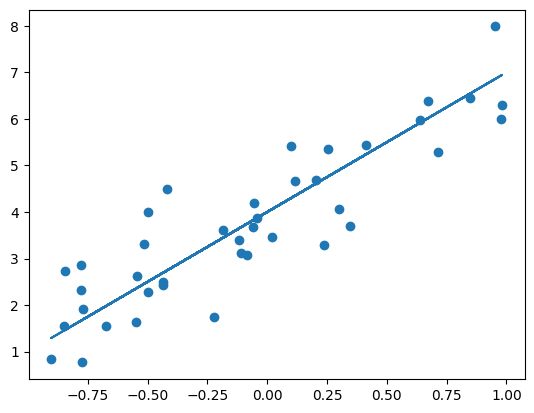

In [72]:
np.random.seed(45)
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
plt.plot(x1,f_x)
y = f_x + eps
plt.scatter(x1,y)
plt.show()

In [126]:
x1_tensor= torch.from_numpy(x1)
y_tensor= torch.from_numpy(y)
theta_1 = torch.tensor(1.0, requires_grad=True)  
theta_0 = torch.tensor(0.0, requires_grad=True) 
y_hat = theta_0 + theta_1*x1_tensor
MSE= torch.mean((y_tensor-y_hat)**2)
grad_theta_0_, grad_theta_1 = torch.autograd.grad(outputs=MSE, inputs=[theta_0, theta_1])
print(f"Gradient with respect to θ0 (theta_0.grad): {grad_theta_0_}")
print(f"Gradient with respect to θ1 (theta_1.grad): {grad_theta_1}")


Gradient with respect to θ0 (theta_0.grad): -7.616434574127197
Gradient with respect to θ1 (theta_1.grad): -0.39361661672592163


TASK-1 Question-2

In [74]:
theta_1 = torch.tensor(1.0, requires_grad=True)  
theta_0 = torch.tensor(0.0, requires_grad=True)
n= len(x1_tensor)
estimated_mse_grad_theta_1=0
estimated_mse_grad_theta_0=0
for i in range(n):
    y_hat = theta_0 + theta_1*x1_tensor[i]
    mse = (y_tensor[i]-y_hat)**2
    grad_theta_0, grad_theta_1 = torch.autograd.grad(outputs=mse, inputs=[theta_0, theta_1],allow_unused=True)
    estimated_mse_grad_theta_0+= grad_theta_0/n
    estimated_mse_grad_theta_1+= grad_theta_1/n
        
print(f"Estimated Gradient with respect to θ0 (theta_0.grad): {estimated_mse_grad_theta_0}")
print(f"Estimated Gradient with respect to θ1 (theta_1.grad): {estimated_mse_grad_theta_1}")    

Estimated Gradient with respect to θ0 (theta_0.grad): -7.616434097290039
Estimated Gradient with respect to θ1 (theta_1.grad): -0.393616646528244


In [127]:
abs_difference = abs(estimated_mse_grad_theta_0-grad_theta_0_)
print(abs_difference.item())

4.76837158203125e-07


As we see that the absoulute difference b/w estimated and true gradient is very small. So, the stochastic gradient is a good estimate of the true gradient.

TASK-1 Question-3

In [75]:
X = np.vstack((np.ones(num_samples), x1)).T

# Apply the normal equation to find theta
theta = np.linalg.inv(X.T @ X) @ X.T @ y
print(f"Estimated coefficients: {theta}")
y_pred = X @ theta

# Calculate the Mean Squared Error (MSE)
mse_optimal = np.mean((y - y_pred) ** 2)
print(f"Estimated coefficients: {theta}")
print(f"Mean Squared Error (MSE): {mse_optimal}")

Estimated coefficients: [3.9507064  2.68246893]
Estimated coefficients: [3.9507064  2.68246893]
Mean Squared Error (MSE): 0.5957541565733318


In [76]:

theta_1 = 0
theta_0 = 0
y_hat = theta_0 + theta_1 * x1_tensor
MSE = torch.mean((y_tensor - y_hat) ** 2)
alpha = 0.1
count_epoch = 0
loss_full_batch = []
change_1 = torch.tensor(0.0)
change_0 = torch.tensor(0.0)
theta_0_list = []
theta_1_list = [] 
while abs(MSE.item() - mse_optimal) >= 0.001:
        y_hat = theta_0 + theta_1 * x1_tensor
        grad_0 = torch.mean(y_tensor - y_hat)
        grad_1 = torch.mean((y_tensor - y_hat) * x1_tensor)
        theta_0+=grad_0*alpha
        theta_1+=grad_1*alpha
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        y_ = theta_0 + theta_1 * x1_tensor
        MSE = torch.mean((y_tensor - y_) ** 2)
        loss_full_batch.append(MSE.item())
        count_epoch += 1

print(f"Number of epochs: {count_epoch}")
print(f"Final MSE: {MSE.item()}")
print(f"Optimized θ0: {theta_0.item()}, Optimized θ1: {theta_1.item()}")


Number of epochs: 130
Final MSE: 0.5966995162957194
Optimized θ0: 3.9439693240630374, Optimized θ1: 2.6272518203362494


tensor(0.5967, dtype=torch.float64)
Number of epochs: 33
Final MSE: 0.5966605717110862
Optimized θ0: 3.958244448032709, Optimized θ1: 2.6325863238575624


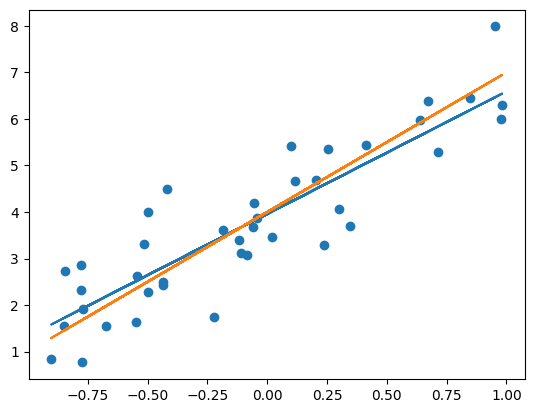

In [77]:
theta_1 = 0.0 
theta_0 = 0.0  
alpha = 0.01
e = 0.001
count_epoch = 0
n = len(x1_tensor)
loss_stochastic=[]
mse=(y_tensor[0]-theta_0-theta_1*x1_tensor[0])
while  abs(mse - mse_optimal) >= e:
    total_mse = 0
    for i in range(n):
        y_hat = theta_0 + theta_1 * x1_tensor[i]
        theta_0+= alpha*(y_tensor[i]-y_hat)
        theta_1+= alpha*(y_tensor[i]-y_hat)*x1_tensor[i]
        y_ = theta_0 + theta_1 * x1_tensor
        mse = torch.mean((y_tensor - y_) ** 2)
    loss_stochastic.append(mse)
    count_epoch += 1
print(mse)
print(f"Number of epochs: {count_epoch}")
print(f"Final MSE: {mse}")
print(f"Optimized θ0: {theta_0}, Optimized θ1: {theta_1}")
y = f_x + eps
plt.scatter(x1,y)
line = theta_0 + theta_1*x1
plt.plot(x1,line)
plt.plot(x1,f_x)
plt.show()

Number of epochs: 8
Final MSE: 0.5965657804871316
Optimized θ0: 3.9249144782368655, Optimized θ1: 2.6529399259486808


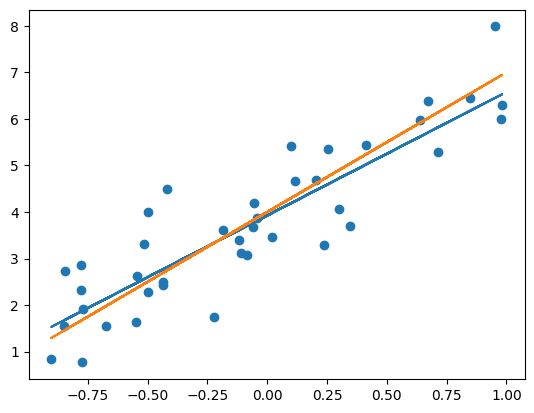

In [78]:
theta_1 = 0.0 
theta_0 = 0.0  
alpha = 0.1
e = 0.001
mini_batch_size=2
count_epoch = 0
n = len(x1_tensor)
loss_mini_batch=[]
mse=torch.mean(y_tensor[:mini_batch_size]-theta_0-theta_1*x1_tensor[:mini_batch_size])
while  abs(mse - mse_optimal) >= e:
    for i in range(n//mini_batch_size):
        y_hat = theta_0 + theta_1 * x1_tensor[i:i+mini_batch_size]
        theta_0+= alpha*torch.mean(y_tensor[i:i+mini_batch_size]-y_hat)
        theta_1+= alpha*torch.mean((y_tensor[i:i+mini_batch_size]-y_hat)*x1_tensor[i:i+mini_batch_size])
        y_ = theta_0 + theta_1 * x1_tensor
        mse = torch.mean((y_tensor - y_) ** 2)
    loss_mini_batch.append(mse)
    count_epoch += 1

print(f"Number of epochs: {count_epoch}")
print(f"Final MSE: {mse}")
print(f"Optimized θ0: {theta_0}, Optimized θ1: {theta_1}")
y = f_x + eps
plt.scatter(x1,y)
line = theta_0 + theta_1*x1
plt.plot(x1,line)
plt.plot(x1,f_x)
plt.show()

We can see that batch gradient descent has the largest number of epoch used to reach the minimum loss value

Number of epochs: 16
Final MSE: 0.793444488690224
Optimized θ0: 3.7562010288238525, Optimized θ1: 1.9169753789901733
Number of epochs: 16
Final MSE: 0.6113859415054321
Optimized θ0: 3.9764015674591064, Optimized θ1: 2.6495301723480225
Number of epochs: 16
Final MSE: 0.6279759407043457
Optimized θ0: 4.010770320892334, Optimized θ1: 2.70054030418396


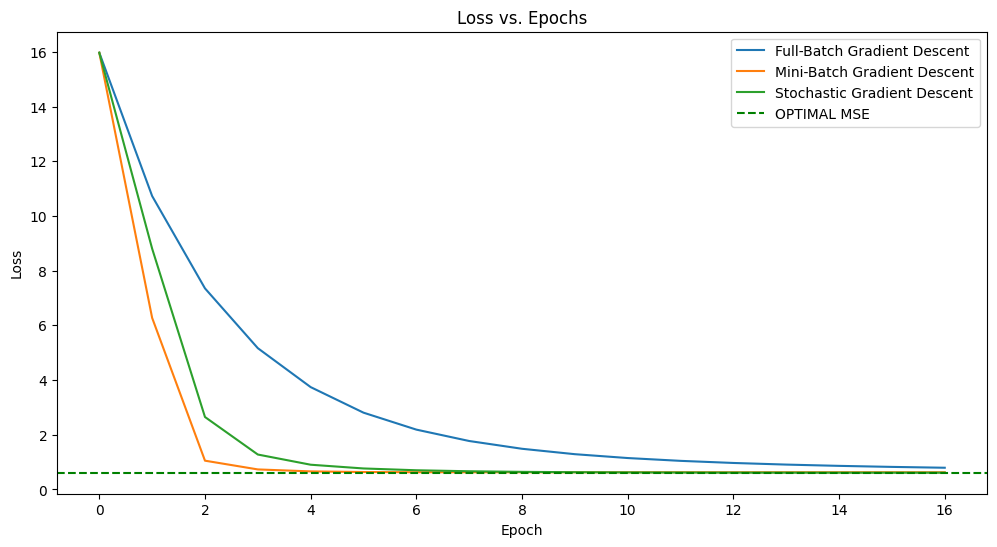

In [79]:
# Batch Gradient decent
theta_1 = torch.tensor(1.0, requires_grad=True)  
theta_0 = torch.tensor(0.0, requires_grad=True)
y_hat = theta_0 + theta_1*x1_tensor
MSE= torch.mean((y_tensor-y_hat)**2)
MSE_=MSE.item()
e=0.0001
prev_MSE=-1
alpha= 0.1
count_epoch=0
loss_full_batch=[MSE_]
theta_0_history=[theta_0.item()]
theta_1_history=[theta_1.item()]
while(prev_MSE==-1 or count_epoch<=15 ) :
    MSE.backward()
    with torch.no_grad():
        theta_1 -= alpha * theta_1.grad
        theta_0 -= alpha * theta_0.grad
    theta_1.grad.zero_()
    theta_0.grad.zero_()
    y_hat = theta_0 + theta_1 * x1_tensor
    prev_MSE = MSE.item()
    MSE = torch.mean((y_tensor - y_hat) ** 2)
    loss_full_batch.append(MSE.item())
    count_epoch+=1
    theta_0_history.append(theta_0.item())
    theta_1_history.append(theta_1.item())
    
print(f"Number of epochs: {count_epoch}")
print(f"Final MSE: {MSE.item()}")
print(f"Optimized θ0: {theta_0.item()}, Optimized θ1: {theta_1.item()}") 

theta_1 = torch.tensor(1.0, requires_grad=True)  
theta_0 = torch.tensor(0.0, requires_grad=True)  
alpha = 0.01
e = 0.0001
prev_MSE = -1
count_epoch = 0
n = len(x1_tensor)
loss_stochastic=[MSE_]
theta_0_history_s=[theta_0.item()]
theta_1_history_s=[theta_1.item()]
while prev_MSE == -1 or count_epoch<=15:
    prev_MSE = mse.item()
    total_mse = 0
    for i in range(n):
        y_hat = theta_0 + theta_1 * x1_tensor[i]
        mse = (y_tensor[i] - y_hat) ** 2
        mse.backward()
        total_mse += mse.item()
        with torch.no_grad():
            theta_1 -= alpha * theta_1.grad
            theta_0 -= alpha * theta_0.grad
        theta_1.grad.zero_()
        theta_0.grad.zero_()
    theta_0_history_s.append(theta_0.item())
    theta_1_history_s.append(theta_1.item())
    mse = torch.tensor(total_mse / n)
    loss_stochastic.append(mse.item())
    count_epoch += 1

print(f"Number of epochs: {count_epoch}")
print(f"Final MSE: {mse.item()}")
print(f"Optimized θ0: {theta_0.item()}, Optimized θ1: {theta_1.item()}")

theta_1 = torch.tensor(1.0, requires_grad=True)  
theta_0 = torch.tensor(0.0, requires_grad=True)  
alpha = 0.1
e = 0.0001
prev_MSE = -1
count_epoch = 0
n = len(x1_tensor)
mini_batch_size=5
loss_mini_batch=[MSE_]
theta_0_history_mb=[theta_0.item()]
theta_1_history_mb=[theta_1.item()]
while prev_MSE == -1 or count_epoch<=15:
    prev_MSE = mse.item()
    total_mse = 0
    for i in range(0,n,mini_batch_size):
        y_hat = theta_0 + theta_1 * x1_tensor[i:i+mini_batch_size]
        mse = torch.mean((y_tensor[i:i+mini_batch_size] - y_hat) ** 2)
        mse.backward()
        total_mse += mse.item()
        with torch.no_grad():
            theta_1 -= alpha * theta_1.grad
            theta_0 -= alpha * theta_0.grad
        theta_0_history_mb.append(theta_0.item())
        theta_1_history_mb.append(theta_1.item())
        theta_1.grad.zero_()
        theta_0.grad.zero_()
    mse = torch.tensor(total_mse*mini_batch_size / n)
    loss_mini_batch.append(mse.item())
    count_epoch += 1

print(f"Number of epochs: {count_epoch}")
print(f"Final MSE: {mse.item()}")
print(f"Optimized θ0: {theta_0.item()}, Optimized θ1: {theta_1.item()}")


plt.figure(figsize=(12, 6))
plt.plot(loss_full_batch, label='Full-Batch Gradient Descent')
plt.plot(loss_mini_batch, label='Mini-Batch Gradient Descent')
plt.plot(loss_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.axhline(y=mse_optimal, color='green', linestyle='--', label="OPTIMAL MSE")
plt.legend()
plt.show()


Full batch gradient descent more epoaches (130) than stochastic and mini batch gradient descent. This is because full batch update theta in one epoach while stochastic and mini_batch update theta values much more times in an epoach. 

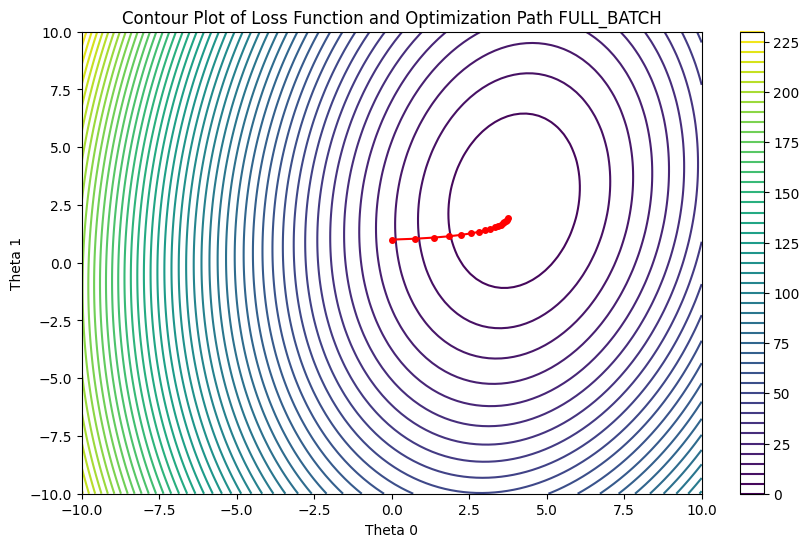

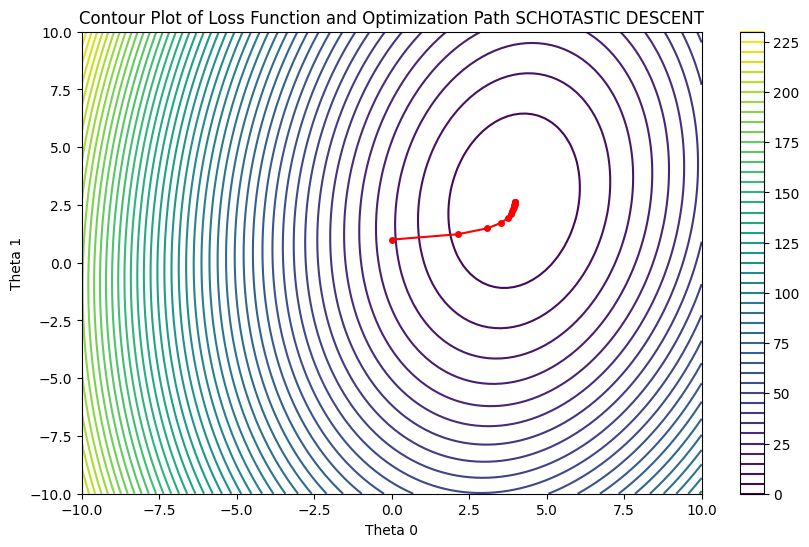

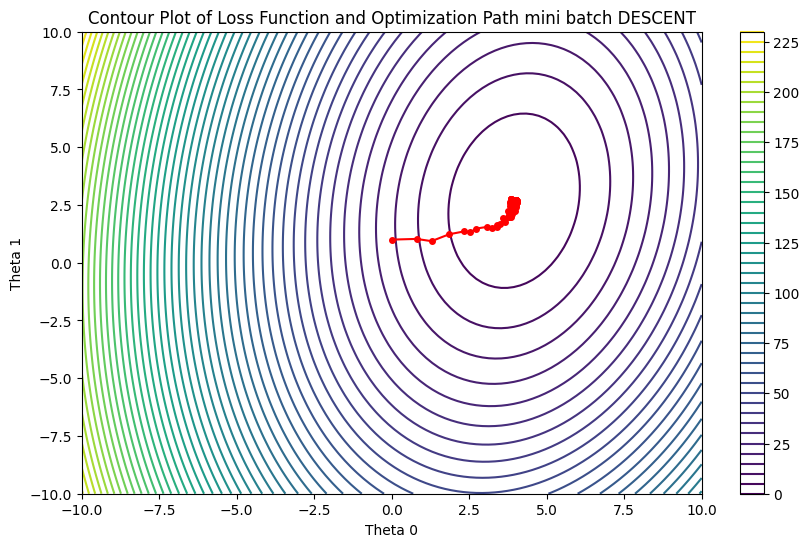

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function for linear regression
def loss_function(theta_0, theta_1, x, y):
    y_pred = theta_1 * x + theta_0
    return np.mean((y - y_pred) ** 2)

# Create a grid of theta values
theta_0_values = np.linspace(-10, 10, 100)
theta_1_values = np.linspace(-10, 10, 100)
theta_0_grid, theta_1_grid = np.meshgrid(theta_0_values, theta_1_values)
loss_grid = np.zeros_like(theta_0_grid)

# Compute the loss over the grid
for i in range(theta_0_grid.shape[0]):
    for j in range(theta_0_grid.shape[1]):
        loss_grid[i, j] = loss_function(theta_0_grid[i, j], theta_1_grid[i, j], x1, y)

# Plot the contour plot
plt.figure(figsize=(10, 6))
contour = plt.contour(theta_0_grid, theta_1_grid, loss_grid, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.plot(theta_0_history, theta_1_history, 'ro-', markersize=4)  # Plot optimization path
plt.title('Contour Plot of Loss Function and Optimization Path FULL_BATCH')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.figure(figsize=(10, 6))
contour = plt.contour(theta_0_grid, theta_1_grid, loss_grid, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.plot(theta_0_history_s, theta_1_history_s, 'ro-', markersize=4)  # Plot optimization path
plt.title('Contour Plot of Loss Function and Optimization Path SCHOTASTIC DESCENT')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.figure(figsize=(10, 6))
contour = plt.contour(theta_0_grid, theta_1_grid, loss_grid, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.plot(theta_0_history_mb, theta_1_history_mb, 'ro-', markersize=4)  # Plot optimization path
plt.title('Contour Plot of Loss Function and Optimization Path mini batch DESCENT')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.show()


TASK-1 Question-4

In [129]:
import torch
import matplotlib.pyplot as plt

# Initialize parameters
theta_1 = 0
theta_0 = 0
y_hat = theta_0 + theta_1 * x1_tensor

# Mean Squared Error (MSE)
MSE = torch.mean((y_tensor - y_hat) ** 2)

# Learning parameters
alpha = 0.1
momentum = 0.9
count_epoch = 0
loss_full_batch_m = []

# Initialize momentum changes
change_1 = 0
change_0 = 0
theta_0_list = []
theta_1_list = [] 
change_0_list=[]
change_1_list=[]

while abs(MSE.item() - mse_optimal) >= 0.001:
        y_hat = theta_0 + theta_1 * x1_tensor
        grad_0 = torch.mean(y_tensor - y_hat)
        grad_1 = torch.mean((y_tensor - y_hat) * x1_tensor)
        change_0 = momentum * change_0 + (1 - momentum) *2* grad_0
        change_1 = momentum * change_1 + (1 - momentum) *2* grad_1
        theta_0 += change_0 * alpha
        theta_1 += change_1 * alpha
        theta_0_list.append(theta_0.item())
        theta_1_list.append(theta_1.item())
        y_ = theta_0 + theta_1 * x1_tensor
        MSE = torch.mean((y_tensor - y_) ** 2)
        loss_full_batch_m.append(MSE.item())
        count_epoch += 1
        change_0_list.append(change_0)
        change_1_list.append(change_1)
        

print(f"Number of epochs: {count_epoch}")
print(f"Final MSE: {MSE.item()}")
print(f"Optimized θ0: {theta_0.item()}, Optimized θ1: {theta_1.item()}")


Number of epochs: 37
Final MSE: 0.5959908749392316
Optimized θ0: 3.935255246212187, Optimized θ1: 2.6750440547884367


Final MSE: 0.5963891026110577
Number of epochs: 16
Optimized θ0: 3.9369277938919702, Optimized θ1: 2.6410531800935377


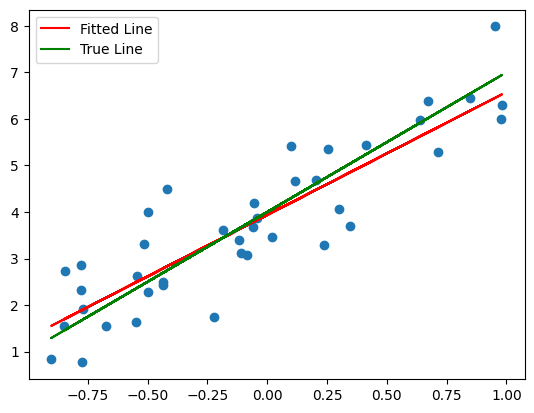

In [128]:
theta_1 = 0.0 
theta_0 = 0.0  
alpha = 0.01
e = 0.001
count_epoch = 0
n = len(x1_tensor)
loss_stochastic_m = []
momentum = 0.9

change_0 = 0
change_1 = 0
theta_0_list_s = [theta_0]
theta_1_list_s = [theta_1] 
change_list0_s=[]
change_list1_s=[]

# Initial MSE
y_ = theta_0 + theta_1 * x1_tensor
mse = torch.mean((y_tensor - y_) ** 2)

while abs(mse - mse_optimal) >= e:
    for i in range(n):
        # Calculate the prediction
        y_hat = theta_0 + theta_1 * x1_tensor[i]
        
        # Compute the gradients
        grad_0 = y_tensor[i] - y_hat
        grad_1 = (y_tensor[i] - y_hat) * x1_tensor[i]
        
        # Update momentum-based changes
        change_0 = momentum * change_0 + (1 - momentum) * 2*grad_0
        change_1 = momentum * change_1 + (1 - momentum) * 2*grad_1
        
        # Update parameters
        theta_0 += change_0 * alpha
        theta_1 += change_1 * alpha
        theta_0_list_s.append(theta_0.item())
        theta_1_list_s.append(theta_1.item())
        change_list0_s.append(change_0)
        change_list1_s.append(change_1)
        
    
    
    # Calculate the updated MSE for the whole dataset
    y_ = theta_0 + theta_1 * x1_tensor
    mse = torch.mean((y_tensor - y_) ** 2)
    # Store the loss for plotting later
    loss_stochastic_m.append(mse.item())
    count_epoch += 1

# Final outputs
print(f"Final MSE: {mse}")
print(f"Number of epochs: {count_epoch}")
print(f"Optimized θ0: {theta_0}, Optimized θ1: {theta_1}")

# Plotting the results
plt.scatter(x1, y_tensor)
line = theta_0 + theta_1 * x1
plt.plot(x1, line, color='red', label='Fitted Line')
plt.plot(x1, f_x, color='green', label='True Line')  # Assuming f_x is the true function
plt.legend()
plt.show()


On comparing vanilla gradient descent with momentum and full-batch gradient descent , we observe that momentum optimization do a very better job as average epoches for the former is 37 while it is 130 for the latter. On comparing it with schotastic gradient descent and schotastic gradient descent with momentum optimization , the latter performs far more better as it reaches the optimal value in just 16 epoaches.

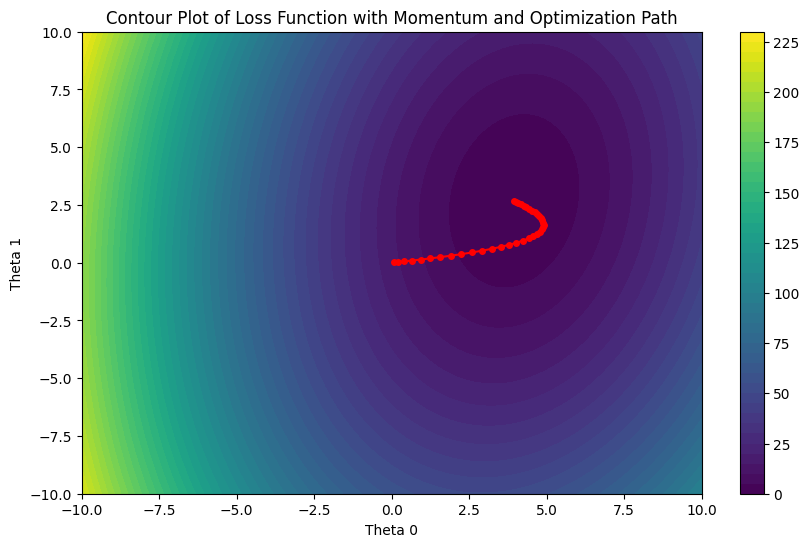

In [130]:


# Define the loss function for linear regression
def loss_function(theta_0, theta_1, x, y):
    y_pred = theta_1 * x + theta_0
    return np.mean((y - y_pred) ** 2)

# Create a grid of theta values
theta_0_values = np.linspace(-10, 10, 100)
theta_1_values = np.linspace(-10, 10, 100)
theta_0_grid, theta_1_grid = np.meshgrid(theta_0_values, theta_1_values)
loss_grid = np.zeros_like(theta_0_grid)

# Compute the loss over the grid
for i in range(theta_0_grid.shape[0]):
    for j in range(theta_0_grid.shape[1]):
        loss_grid[i, j] = loss_function(theta_0_grid[i, j], theta_1_grid[i, j], x1, y)

# Plot the contour plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(theta_0_grid, theta_1_grid, loss_grid, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.plot(theta_0_list, theta_1_list, 'ro-', markersize=4)  # Plot optimization path
plt.title('Contour Plot of Loss Function with Momentum and Optimization Path')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.show()


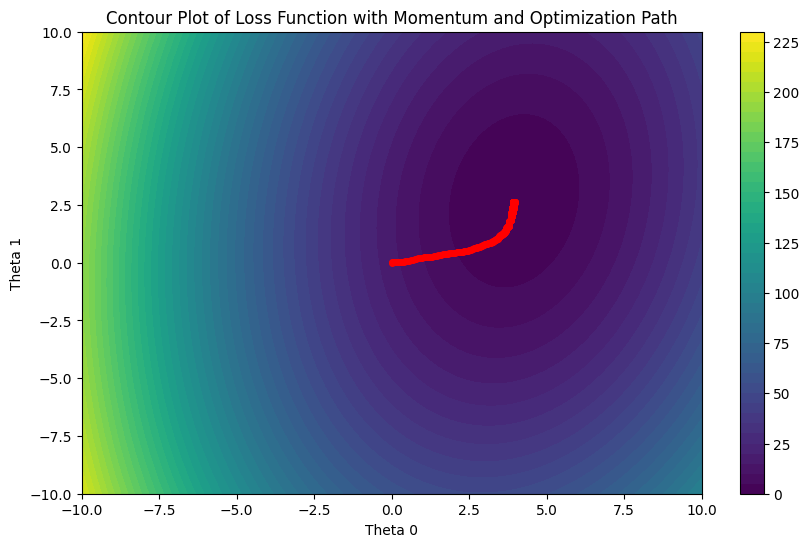

In [131]:

# Create a grid of theta values
theta_0_values = np.linspace(-10, 10, 100)
theta_1_values = np.linspace(-10, 10, 100)
theta_0_grid, theta_1_grid = np.meshgrid(theta_0_values, theta_1_values)
loss_grid = np.zeros_like(theta_0_grid)

# Compute the loss over the grid
for i in range(theta_0_grid.shape[0]):
    for j in range(theta_0_grid.shape[1]):
        loss_grid[i, j] = loss_function(theta_0_grid[i, j], theta_1_grid[i, j], x1, y)

# Plot the contour plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(theta_0_grid, theta_1_grid, loss_grid, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.plot(theta_0_list_s, theta_1_list_s, 'ro-', markersize=4)  # Plot optimization path
plt.title('Contour Plot of Loss Function with Momentum and Optimization Path')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.show()

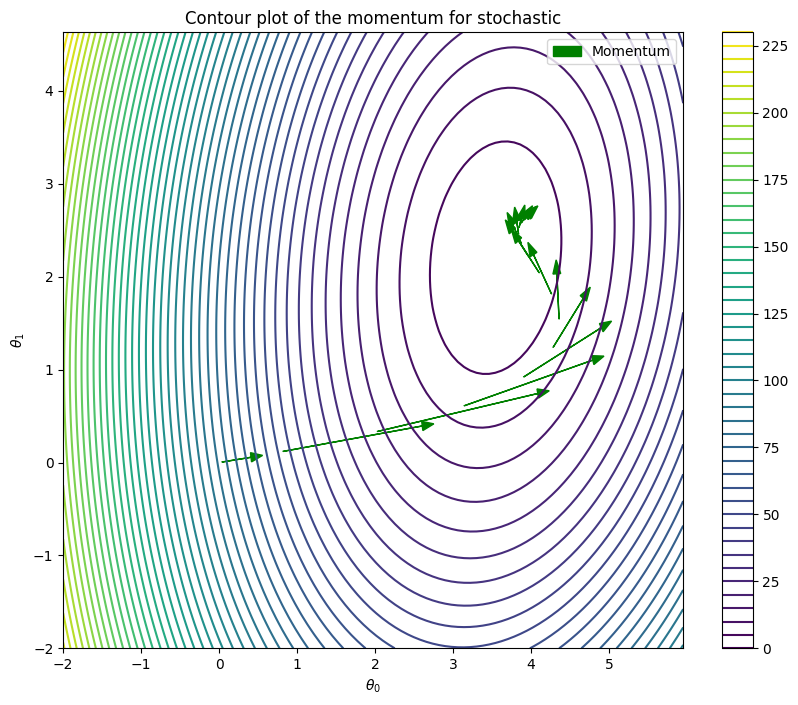

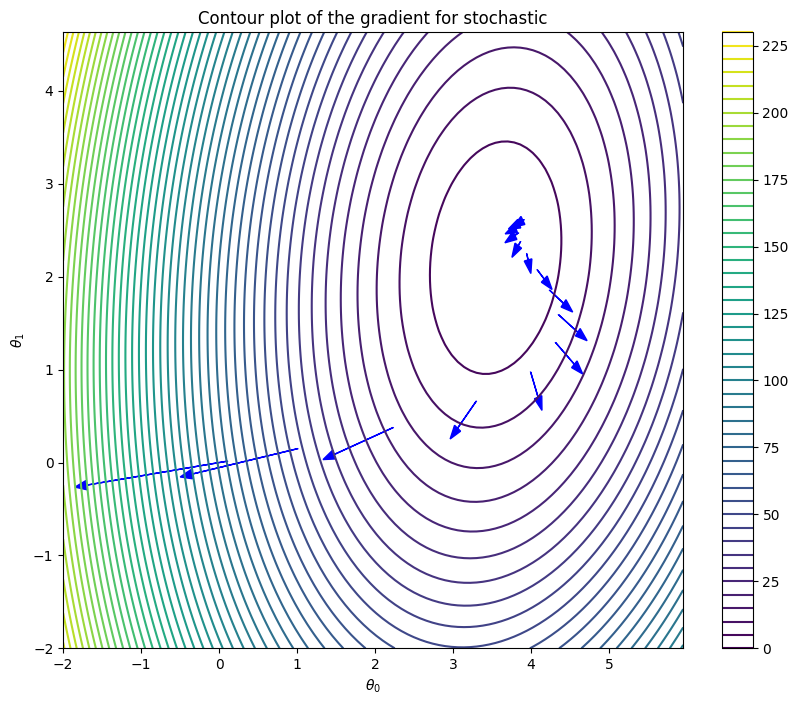

In [121]:
plt.figure(figsize=(10, 8))
contour = plt.contour(theta_0_grid, theta_1_grid, loss_grid, levels=50, cmap="viridis")
plt.colorbar(contour)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title("Contour plot of the momentum for stochastic")
for i in range(0, len(theta_0_list), max(1, len(theta_0_list) // 15)): 
    theta0 = theta_0_list[i]
    theta1 = theta_1_list[i]
    momentum0 = change_0_list[i]
    momentum1 = change_1_list[i]
    plt.arrow(theta0, theta1, momentum0, momentum1, head_width=0.1, color='green', label="Momentum" if i == 0 else "")
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
contour = plt.contour(theta_0_grid, theta_1_grid, loss_grid, levels=50, cmap="viridis")
plt.colorbar(contour)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title("Contour plot of the gradient for stochastic")
for i in range(1, len(theta_0_list)-1, max(1, len(theta_0_list) // 15)):  
    theta0 = theta_0_list[i]
    theta1 = theta_1_list[i]
    grad0, grad1 = -(2 / len(x1_tensor)) * sum(y_tensor - (theta0 + theta1 * x1_tensor)), -(2 / len(x1_tensor)) * sum((y_tensor - (theta0 + theta1 * x1_tensor)) * x1_tensor)
    plt.arrow(theta0, theta1, grad0/4, grad1/4, head_width=0.1, color='blue', label="Gradient" if i == 0 else "")

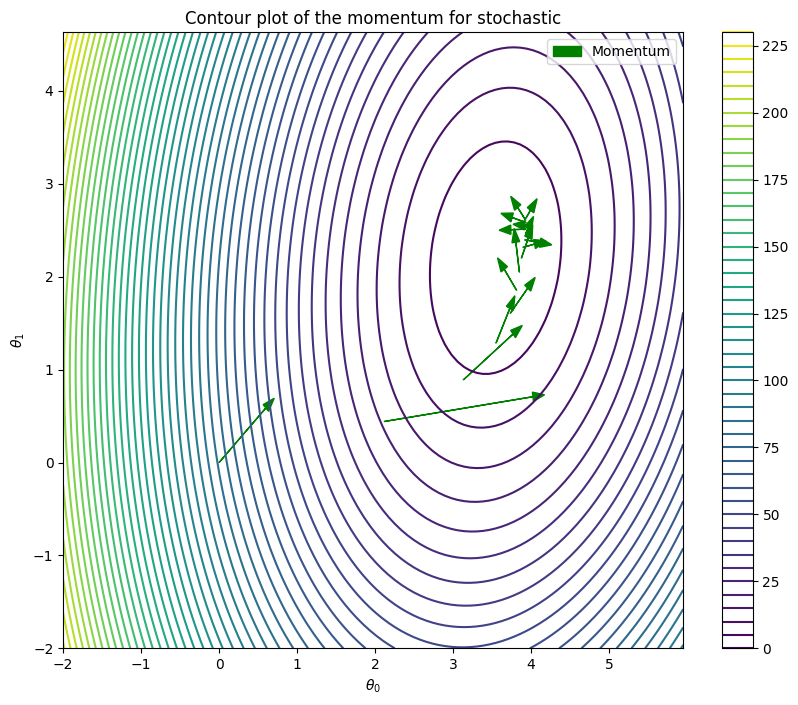

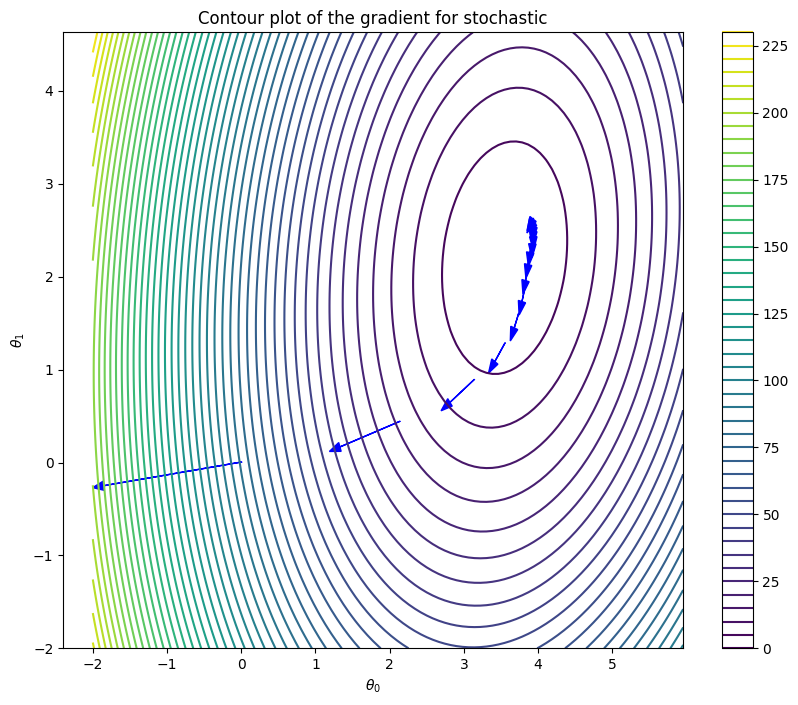

In [117]:
plt.figure(figsize=(10, 8))
contour = plt.contour(theta_0_grid, theta_1_grid, loss_grid, levels=50, cmap="viridis")
plt.colorbar(contour)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title("Contour plot of the momentum for stochastic")
for i in range(0, len(theta_0_list_s), max(1, len(theta_0_list_s) // 15)): 
    theta0 = theta_0_list_s[i]
    theta1 = theta_1_list_s[i]
    momentum0 = change_list0_s[i]
    momentum1 = change_list1_s[i]
    plt.arrow(theta0, theta1, momentum0, momentum1, head_width=0.1, color='green', label="Momentum" if i == 0 else "")
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
contour = plt.contour(theta_0_grid, theta_1_grid, loss_grid, levels=50, cmap="viridis")
plt.colorbar(contour)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title("Contour plot of the gradient for stochastic")
for i in range(1, len(theta_0_list_s)-1, max(1, len(theta_0_list_s) // 15)):  
    theta0 = theta_0_list_s[i]
    theta1 = theta_1_list_s[i]
    grad0, grad1 = -(2 / len(x1_tensor)) * sum(y_tensor - (theta0 + theta1 * x1_tensor)), -(2 / len(x1_tensor)) * sum((y_tensor - (theta0 + theta1 * x1_tensor)) * x1_tensor)
    plt.arrow(theta0, theta1, grad0/4, grad1/4, head_width=0.1, color='blue', label="Gradient" if i == 0 else "")